# Laboratoire 6
- Segmentation de contours
- TP2 (le solutionnaire ne sera pas remis)
- D'autres questions?

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import skimage.data
from skimage.feature import canny
from scipy.ndimage import gaussian_filter, convolve, correlate
from math import sin, cos, tan, radians

## Exercice 1
Implémenter en partie le filtre de Sobel:
1. Si l'image est bruité, appliquer un filtre gaussian
2. Trouver les contours
    - Trouver les gradients X
    - Trouver les gradients Y
2. Combiner les gradients pour obtenir le résultat final

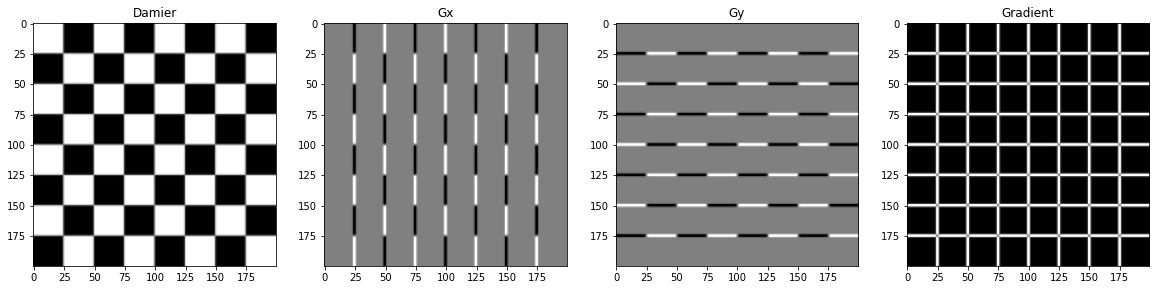

In [58]:
img = skimage.data.checkerboard().astype(np.int64)

hx = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]

hy = [
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
]

plt.figure(figsize=(20,20))

plt.subplot(141); plt.title('Damier'); plt.imshow(img, cmap='gray')

gx = correlate(img, hx)
plt.subplot(142); plt.title('Gx'); plt.imshow(gx, cmap='gray')

gy = correlate(img, hy)
plt.subplot(143); plt.title('Gy'); plt.imshow(gy, cmap='gray')

g = (gx ** 2 + gy ** 2) ** 0.5
plt.subplot(144); plt.title('Gradient'); plt.imshow(g, cmap='gray')

plt.show()

## Exercice 2
Appliquer la méthode de Canny avec différentes valeurs pour le *sigma* et les *thresholds*.

In [38]:
help(canny)

Help on function canny in module skimage.feature._canny:

canny(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)
    Edge filter an image using the Canny algorithm.
    
    Parameters
    -----------
    image : 2D array
        Grayscale input image to detect edges on; can be of any dtype.
    sigma : float, optional
        Standard deviation of the Gaussian filter.
    low_threshold : float, optional
        Lower bound for hysteresis thresholding (linking edges).
        If None, low_threshold is set to 10% of dtype's max.
    high_threshold : float, optional
        Upper bound for hysteresis thresholding (linking edges).
        If None, high_threshold is set to 20% of dtype's max.
    mask : array, dtype=bool, optional
        Mask to limit the application of Canny to a certain area.
    use_quantiles : bool, optional
        If True then treat low_threshold and high_threshold as quantiles of the
        edge magnitude image, rather tha

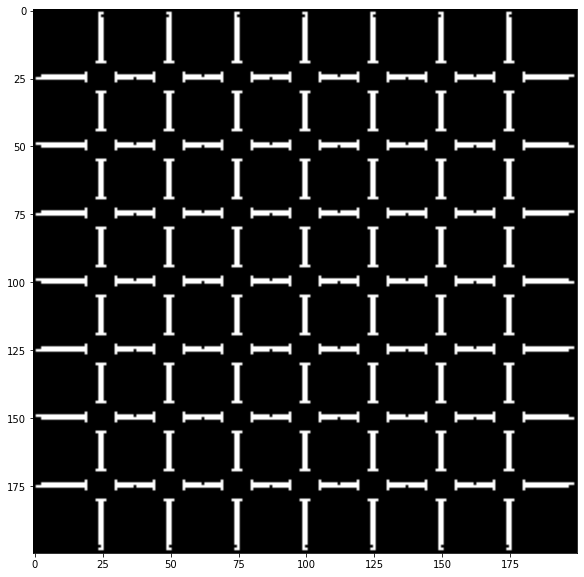

In [73]:
img_canny = canny(img, sigma=5, low_threshold=50. , high_threshold=150.)

plt.figure(figsize=(10,10))
plt.imshow(img_canny, cmap='gray'); plt.show()

## Exercice 3
Tracer la courbe des points **(x:3, y:9)** et **(x:10, y:5)** dans l'espace paramètre de la transformer de Hough

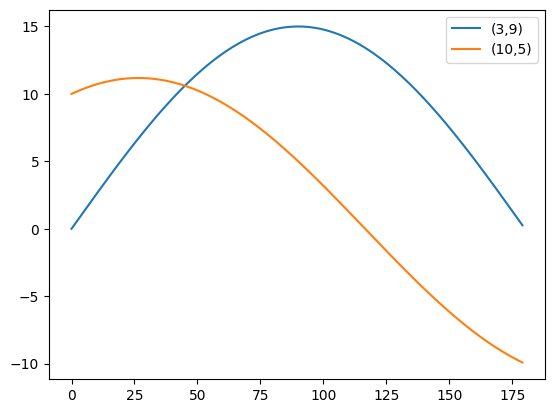

In [37]:
rho_ax1 = []             # axe vertical
rho_ax2 = []             # axe vertical
theta_ax = range(0, 180) # axe horizontal

for theta in theta_ax:
    rho = 0 * cos(radians(theta)) + 15 * sin(radians(theta))
    rho_ax1.append(rho)

plt.plot(theta_ax, rho_ax1, label='(3,9)')
    
for theta in theta_ax:
    rho = 10 * cos(radians(theta)) + 5 * sin(radians(theta))
    rho_ax2.append(rho)
    
plt.plot(theta_ax, rho_ax2, label='(10,5)')
plt.legend()
plt.show()

Afficher maintenant la droite trouvée avec l'intersection des 2 courbes dans le domaine de l'image.  
L'axe **X** de l'image est sur 15.

min index: 45
min index: 10.606601717798211
1.5707963267948966


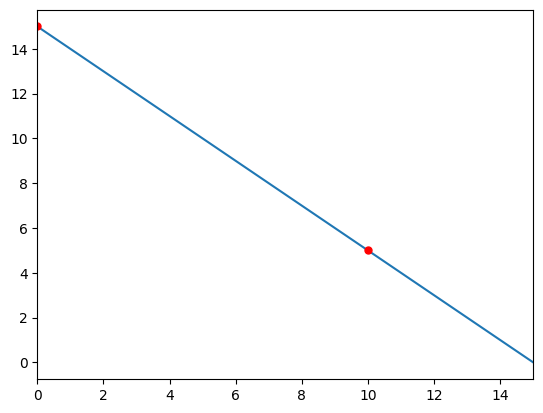

In [40]:
rho_ax1 = np.array(rho_ax1)
rho_ax2 = np.array(rho_ax2)
diff = np.abs(rho_ax1 - rho_ax2)
min_theta = np.where(diff == diff.min())
min_index = min_theta[0][0]
rho_at_min = rho_ax1[min_index]
print('min index:', min_index)
print('min index:', rho_at_min)

x_ax = range(15)
x = [0, 15]
#print(x)
y = [(rho_at_min - cos(radians(min_index)) * x) / sin(radians(min_index)) for x in [0,15]]

print(radians(min_theta[0][0]) * 2)

plt.plot(x, y)
plt.plot([0], [15], marker='o', markersize=5, color="red")
plt.plot([10], [5], marker='o', markersize=5, color="red")
plt.xlim(0, 15)
plt.show()

min index: [60]


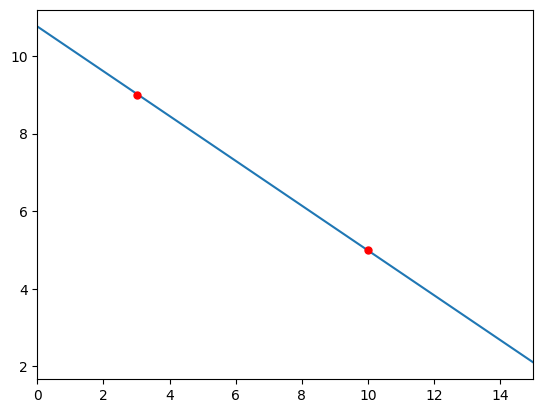

In [18]:
rho_ax1 = np.array(rho_ax1)
rho_ax2 = np.array(rho_ax2)
diff = np.abs(rho_ax1 - rho_ax2)
min_theta = np.where(diff == diff.min())
print('min index:', min_index)

x_ax = range(15)
x = [0, 15]
#print(x)
y = np.array([tan(radians(abs(90 - min_theta[0][0]))) * 15, 0]) + 2.1

plt.plot(x, y)
plt.plot([3], [9], marker='o', markersize=5, color="red")
plt.plot([10], [5], marker='o', markersize=5, color="red")
plt.xlim(0, 15)
plt.show()